# Вариант 7. 
Построить диаграмму зависимости времени 10 хлопков от времени бега на 100 м для тех девушек 1 курса, которые улучшили прыжок в
длину с места на 3 курсе по сравнению с первым курсом, по данным из файла
Volgmed_2013.xls.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FILENAME = "Volgmed_2013.xlsx"
PATH = Path() / "data" / FILENAME

In [3]:
df_input = pd.read_excel(PATH, header=1, index_col=0)
df_input.head()

,Пол,Год рождения,Факультет,Курс,Группа,Год поступления,Дата обследования,"Рост, см","Вес, кг","Окружность грудной клетки в покое, см",...,"Гибкость, см","Время 10 хлопков, с","Прыжок в длину с места, см","Челночный бег, с","Силовой норматив, ед","Бег 100 м, с","Бег 2-3 км, мин","Статическая выносливость, с","Задержка дыхания, с","Равновесие, с"
№ п/п,,,,,,,,,,,,,,,,,,,,,
1.0,жен,1985,лечебный,1.0,1,2004,2002-05-01,166.0,61,85.0,...,16,6.8,148,25.8,40,18.7,10.3,120.0,35.0,60.0
NaN,жен,1985,лечебный,2.0,1,2004,2002-05-01,166.0,61,85.0,...,16,6.8,150,25.5,30,18.5,11.1,120.0,35.0,55.0
NaN,жен,1985,лечебный,3.0,1,2004,2002-05-01,166.0,61,85.0,...,17,6.6,140,25.9,42,20,11.1,NaN,NaN,NaN
2.0,жен,1985,лечебный,1.0,1,2004,2002-05-01,167.0,57,82.0,...,17,6.0,180,22.1,58,15,9.9,180.0,52.0,43.0
NaN,жен,1985,лечебный,2.0,1,2004,2002-05-01,167.0,57,NaN,...,18,6.2,180,22,64,15.4,9.5,NaN,NaN,NaN


In [24]:
df = df_input.rename(
    columns={
        "Пол": "sex",
        "Курс": "grade",
        "Время 10 хлопков, с": "clap",
        "Прыжок в длину с места, см": "jump",
        "Бег 100 м, с": "run",
    }
)
df.index.names = ["k"]
df.index = df.index.fillna(value="")
df = df[["sex", "grade", "clap", "jump", "run"]]
df = df[(df.sex == "жен") & ((df.grade == 1) | (df.grade == 3))]
df

,sex,grade,clap,jump,run
k,,,,,
1.0,жен,1.0,6.8,148,18.7
,жен,3.0,6.6,140,20
2.0,жен,1.0,6.0,180,15
,жен,3.0,6.2,180,15.3
3.0,жен,1.0,6.4,183,16.7
...,...,...,...,...,...
,жен,3.0,5.9,155,18.1
126.0,жен,1.0,6.1,190,17.3
,жен,3.0,5.9,186,16.7


In [40]:
clap_scores, run_scores = [], []

for ik, k in enumerate(df.index):
    if k:
        first_grade_jump_score = df.jump.iloc[ik]
        third_grade_jump_score = df.jump.iloc[ik + 1]

        if all(
            (
                isinstance(first_grade_jump_score, int),
                isinstance(third_grade_jump_score, int),
            )
        ):
            if third_grade_jump_score > first_grade_jump_score:
                first_grade_clap_score = df.clap.iloc[ik]
                first_grade_run_score = df.run.iloc[ik]

                if any(
                    (
                        isinstance(first_grade_clap_score, str),
                        isinstance(first_grade_run_score, str),
                    )
                ):
                    continue

                clap_scores.append(float(first_grade_clap_score))
                run_scores.append(first_grade_run_score)

print(len(clap_scores), clap_scores[:10])
print(len(run_scores), run_scores[:10])

51 [6.9, 6.3, 6.1, 6.5, 6.5, 6.2, 6.1, 6.6, 6.0, 6.0]
51 [18.4, 19.2, 18.7, 18.6, 18.2, 16.3, 17.7, 16.3, 15.8, 16.6]


In [47]:
print(run_scores[14])

180


In [48]:
run_scores[14] /= 10

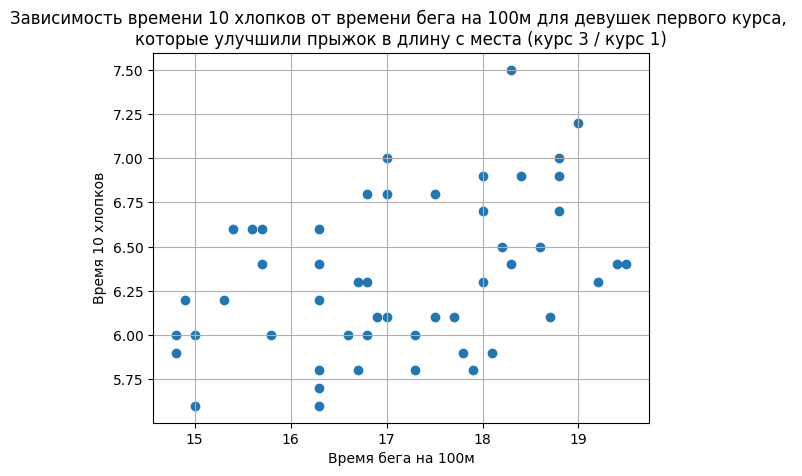

In [52]:
plt.scatter(run_scores, clap_scores)
plt.title(
    "Зависимость времени 10 хлопков от времени бега на 100м "
    "для девушек первого курса, \n"
    "которые улучшили прыжок в длину с места (курс 3 / курс 1)"
)
plt.xlabel("Время бега на 100м")
plt.ylabel("Время 10 хлопков")
plt.grid()
plt.show()